# Pairwise FST and genetic diversity in *Ostrea lurida*
This notebook details how I calculated and plotted pairwise FST, as well as the genetic diversity within populations and within regions. I do this for the full combined dataset, then again for the outlier and neutral datasets.

In [3]:
library("adegenet") #For storing genotype data
library(hierfstat) #For calculating pairwise Fst
library(ggplot2) #For plotting
library(reshape2) #For plotting
library(plyr)
library("cowplot") #For plotting manuscript figs

Loading required package: ade4

   /// adegenet 2.1.1 is loaded ////////////

   > overview: '?adegenet'
   > tutorials/doc/questions: 'adegenetWeb()' 
   > bug reports/feature requests: adegenetIssues()



Attaching package: ‘hierfstat’

The following object is masked from ‘package:adegenet’:

    read.fstat


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



## Combined
Load previously created Adegenet genind object and hierfstat object, made using radiator from a .vcf file.

In [51]:
load("../Inputs/OL-c85t10-x45m75-maf025-filt.hf")
load("../Inputs/OL-c85t10-x45m75-maf025-filt.genind")

In [4]:
pop_order <- c("Klaskino_BC","Barkeley_BC","Ladysmith_BC","Victoria_BC","Discovery_WA","Liberty_WA","TritonCove_WA","NorthBay_WA","Willapa_WA","Netarts_OR","Yaquina_OR","Coos_OR","Humboldt_CA","Tomales_CA","NorthSanFran_CA","SouthSanFran_CA","Elkhorn_CA","MuguLagoon_CA","SanDiego_CA")


### Pairwise Fst

In [4]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat <- genet.dist(hf.filt, method = "WC84")

In [5]:
gindF.fst.mat.tri <- as.matrix(fst.mat)
colnames(gindF.fst.mat.tri) <- pop_order
rownames(gindF.fst.mat.tri) <- pop_order
write.table(gindF.fst.mat.tri, file="OL-t10x45m75-maf025-Pop.pwfst",row.names = T,col.names = T)

In [6]:
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [7]:
gindF.fst.mat.tri

,Klaskino_BC,Barkeley_BC,Ladysmith_BC,Victoria_BC,Discovery_WA,Liberty_WA,TritonCove_WA,NorthBay_WA,Willapa_WA,Netarts_OR,Yaquina_OR,Coos_OR,Humboldt_CA,Tomales_CA,NorthSanFran_CA,SouthSanFran_CA,Elkhorn_CA,MuguLagoon_CA,SanDiego_CA
Klaskino_BC,0.00000000,0.03067712,0.06714673,0.12490144,0.07655627,0.100654928,0.07974073,0.101355131,0.120187778,0.09023847,0.12592140,0.123200828,0.10022253,0.10221212,0.134669682,0.133910122,0.13179916,0.148314942,0.154089830
Barkeley_BC,0.03067712,0.00000000,0.05640463,0.13060576,0.07690291,0.104433090,0.08297143,0.107576118,0.129281161,0.09612569,0.13751103,0.131956796,0.10219359,0.09906828,0.131987278,0.128233864,0.12237762,0.137853858,0.143980234
Ladysmith_BC,0.06714673,0.05640463,0.00000000,0.09592442,0.03858570,0.066472179,0.05309145,0.076809632,0.124915819,0.08807878,0.13278196,0.132469503,0.08610709,0.09352788,0.128276598,0.132531297,0.11944856,0.137298331,0.143767538
Victoria_BC,0.12490144,0.13060576,0.09592442,0.00000000,0.09063501,0.087746363,0.05886498,0.091967412,0.132592637,0.11553886,0.15393702,0.141608295,0.12644887,0.13550508,0.166586224,0.180852450,0.16804777,0.184305801,0.190200495
Discovery_WA,0.07655627,0.07690291,0.03858570,0.09063501,0.00000000,0.053449984,0.01920878,0.048330918,0.110428292,0.08574289,0.12796028,0.117357045,0.09792979,0.10975606,0.142296419,0.150868926,0.13968404,0.155989356,0.158444619
Liberty_WA,0.10065493,0.10443309,0.06647218,0.08774636,0.05344998,0.000000000,0.01648721,0.007130023,0.125338637,0.09058670,0.14360807,0.129037910,0.09688543,0.12446749,0.156769904,0.166270539,0.15523076,0.171806334,0.176653690
TritonCove_WA,0.07974073,0.08297143,0.05309145,0.05886498,0.01920878,0.016487210,0.00000000,0.024649004,0.101613187,0.07670092,0.12481504,0.112172178,0.08597934,0.10729038,0.136850949,0.144783268,0.13057790,0.152716283,0.154566091
NorthBay_WA,0.10135513,0.10757612,0.07680963,0.09196741,0.04833092,0.007130023,0.02464900,0.000000000,0.121323778,0.08343491,0.14179866,0.126357836,0.09621019,0.12502058,0.156818206,0.167342163,0.15388471,0.174589156,0.179490846
Willapa_WA,0.12018778,0.12928116,0.12491582,0.13259264,0.11042829,0.125338637,0.10161319,0.121323778,0.000000000,0.06562102,0.09631307,0.001830012,0.10184664,0.11855069,0.132654927,0.145795833,0.13292702,0.153632357,0.161687319
Netarts_OR,0.09023847,0.09612569,0.08807878,0.11553886,0.08574289,0.090586704,0.07670092,0.083434905,0.065621019,0.00000000,0.03110529,0.069502479,0.07757865,0.08913737,0.114063128,0.111972205,0.11140280,0.135862010,0.140976246


In [8]:
#Average pairwise Fst
summary(melted$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0767  0.1122  0.1026  0.1373  0.1902 

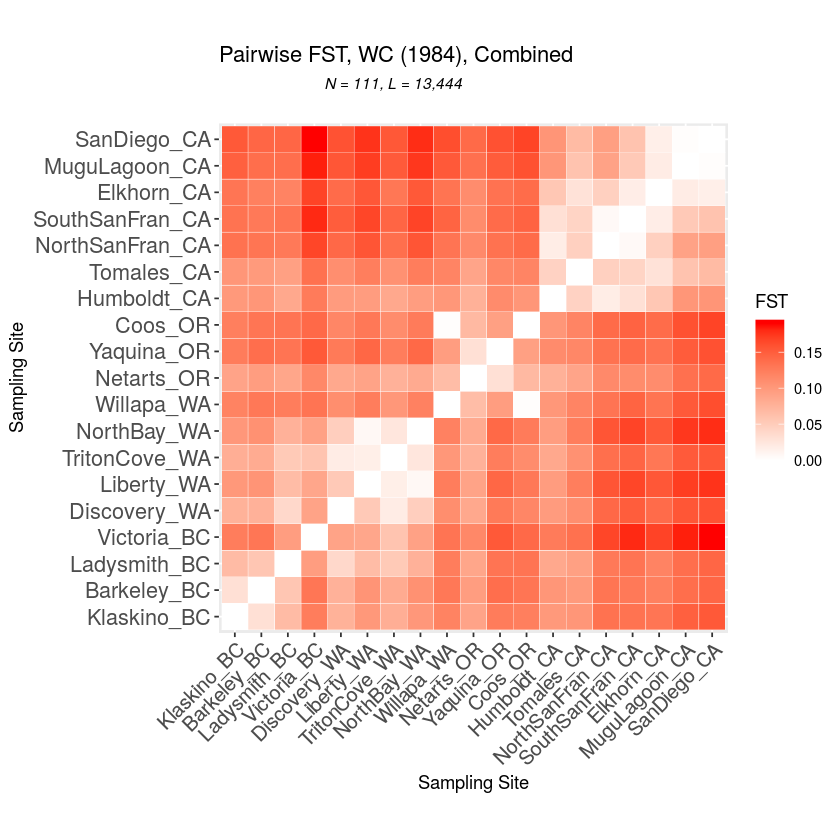

In [9]:
combined <- ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Combined", atop(italic("N = 111, L = 13,444 "), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()
combined

In [ ]:
pdf("OL-c85t10-x45m75-maf025-filt-pwfst.pdf",width=6,height=4) 
par(mfrow=c(2,1))

\dev.off()

#### Regions

In [17]:
hf.reg <- hf.filt
regions <- c("NW_BC","NW_BC",rep("Puget+BC",6),"Willapa_Coos","Oregon","Oregon","Willapa_Coos",rep("NoCal",3),rep("SoCal",3))
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18), to = regions)

In [8]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.reg <- genet.dist(hf.reg, method = "WC84")

In [15]:
fst.mat.reg

                  NoCal      NW_BC     Oregon   Puget+BC      SoCal
NW_BC        0.09530460                                            
Oregon       0.08576601 0.09451799                                 
Puget+BC     0.09568923 0.06435994 0.08862757                      
SoCal        0.05151527 0.12908651 0.12548427 0.14682707           
Willapa_Coos 0.10362400 0.11713546 0.07495828 0.09950112 0.14633049

In [17]:
NS <- c("NW_BC","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
gindF.fst.mat.tri <- as.matrix(fst.mat.reg)
gindF.fst.mat.tri <- gindF.fst.mat.tri[NS,NS]

In [18]:
write.table(gindF.fst.mat.tri, file="OL-m80x55-maf025-Reg.pwfst",row.names = T,col.names = T)

gindF.fst.mat.tri[lower.tri(fst.mat.reg, diag=TRUE)] <- NA
melted <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [19]:
gindF.fst.mat.tri

,NW_BC,Puget+BC,Willapa_Coos,Oregon,NoCal,SoCal
NW_BC,NA,0.06435994,0.11713546,0.09451799,0.09530460,0.12908651
Puget+BC,NA,NA,0.09950112,0.08862757,0.09568923,0.14682707
Willapa_Coos,NA,NA,NA,0.07495828,0.10362400,0.14633049
Oregon,NA,NA,NA,NA,0.08576601,0.12548427
NoCal,NA,NA,NA,NA,NA,0.05151527
SoCal,NA,NA,NA,NA,NA,NA


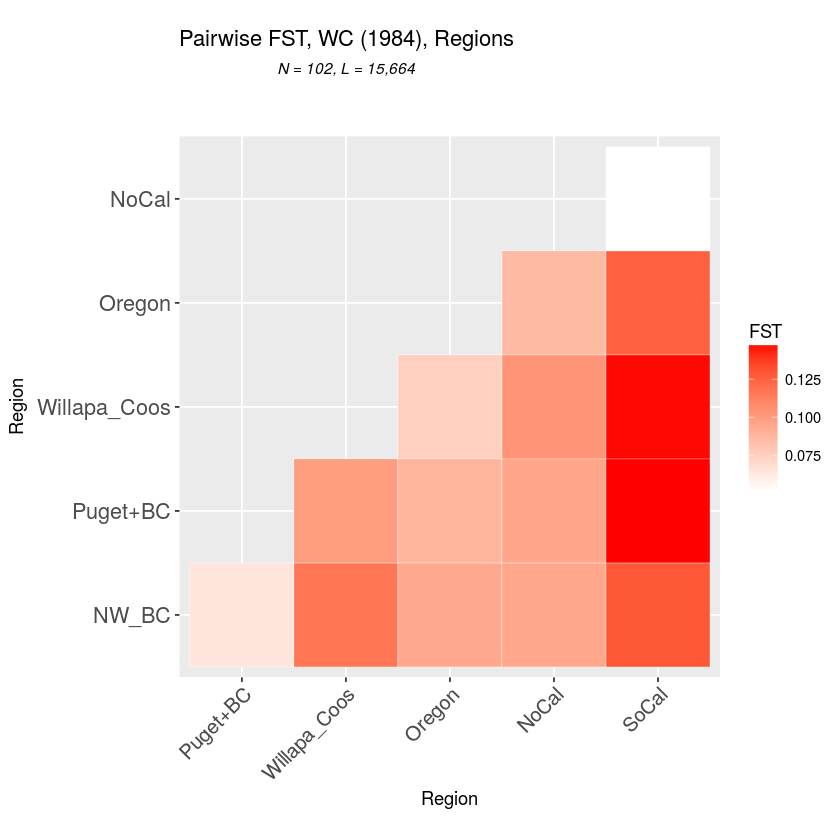

In [20]:
par(mfrow=c(2,1))
ggplot(data = melted, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Regions", atop(italic("N = 102, L = 15,664"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()

### Genetic diversity (observed and expected heterozygosity)

In [121]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

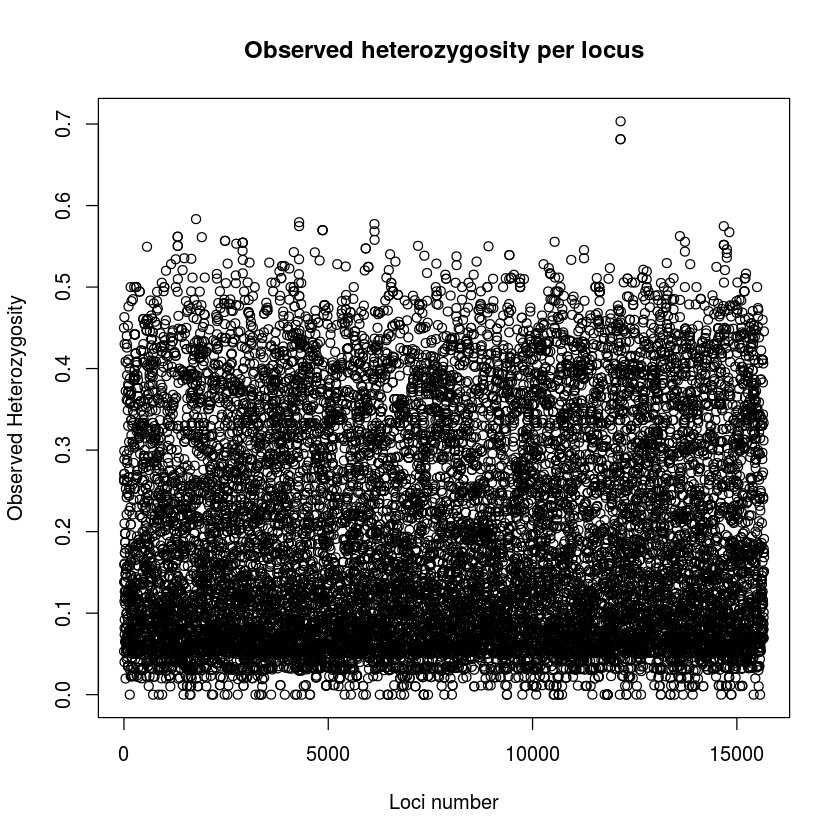

In [122]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

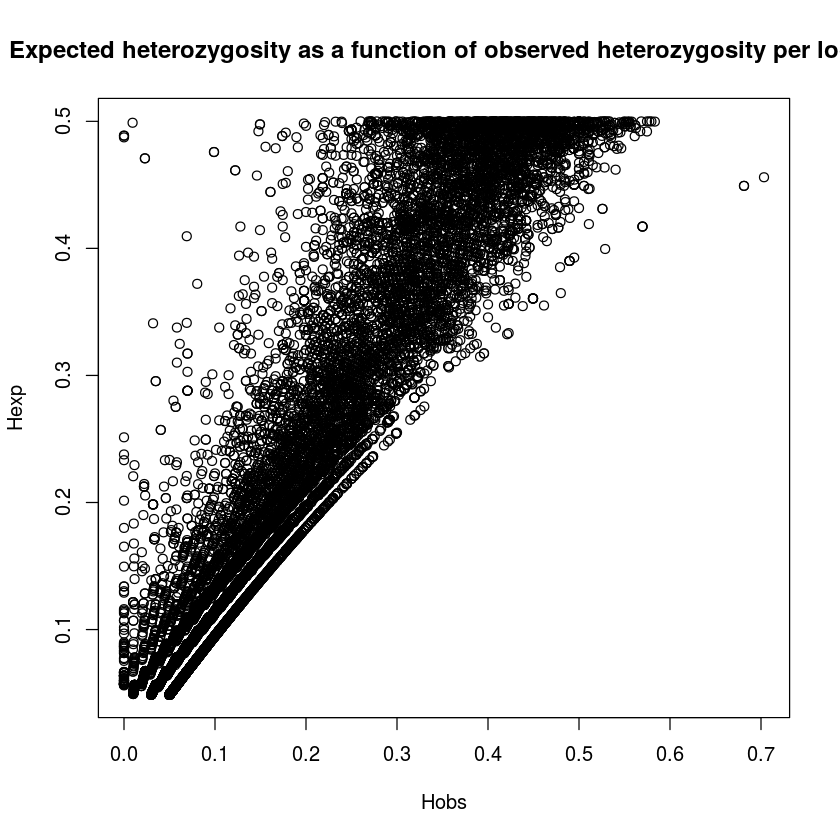

In [123]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [124]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 264.04, df = 1, p-value < 2.2e-16


Significant difference between observed and expected heterozygosity

In [52]:
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 3) 

In [14]:
names(basicstat)

[1] "n.ind.samp" "pop.freq"   "Ho"         "Hs"         "Fis"       
[6] "perloc"     "overall"

In [53]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.191
Hs,0.202
Ht,0.225
Dst,0.024
Htp,0.227
Dstp,0.025
Fst,0.105
Fstp,0.110
Fis,0.051
Dest,0.031


In [55]:
boot <- boot.ppfis(hf.filt,nboot = 1000)
boot5 <- boot.ppfis(hf.filt,nboot = 1000, quant = 0.5)

In [56]:
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis,boot$fis.ci,latitude)
x

,Ho,He,Fis,ll,hl,latitude
Klaskino_BC,0.1771632,0.1904046,0.0693,0.0601,0.0788,50.29867
Barkeley_BC,0.1740636,0.1866887,0.0672,0.0544,0.0800,49.01585
Ladysmith_BC,0.1985277,0.1900292,-0.0538,-0.0684,-0.0391,49.01138
Victoria_BC,0.1626641,0.1719128,0.0525,0.0419,0.0640,48.43567
Discovery_WA,0.1702014,0.1812722,0.0606,0.0495,0.0724,47.99780
Liberty_WA,0.1713408,0.1771610,0.0320,0.0218,0.0433,47.73750
TritonCove_WA,0.1754845,0.1820254,0.0355,0.0231,0.0465,47.61310
NorthBay_WA,0.1664079,0.1758949,0.0535,0.0421,0.0652,47.39250
Willapa_WA,0.1694763,0.1800614,0.0578,0.0465,0.0710,46.53239
Netarts_OR,0.1851186,0.1967948,0.0584,0.0470,0.0698,45.39116


In [57]:
summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.09600  0.03235  0.05350  0.04238  0.06390  0.13270 

#### Regions

In [23]:
#Regions
reg.filt <- stratted.filt
pop(reg.filt) <- mapvalues(pop(reg.filt), from =pop_order, to = regions)

Significant difference between observed and expected heterozygosity

In [115]:
hw <- hw.test(hf.reg, B = 1000)

ERROR: Error in UseMethod("hw.test"): no applicable method for 'hw.test' applied to an object of class "data.frame"


In [18]:
basicstat <- basic.stats(hf.reg, diploid = TRUE, digits = 2) 

In [37]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.19
Hs,0.21
Ht,0.24
Dst,0.02
Htp,0.24
Dstp,0.02
Fst,0.09
Fstp,0.10
Fis,0.10
Dest,0.03


In [19]:
boot <- boot.ppfis(hf.reg,nboot = 500)

In [21]:
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- colMeans(basicstat$Fis,na.rm = T) 
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NW_BC","Puget+BC","Willapa_Coos","Oregon","NoCal","SoCal")
x[NS,]

,Ho,He,Fis,ll,hl
NW_BC,0.1807418,0.1993903,0.07128108,0.0851,0.0977
Puget+BC,0.1783293,0.1973544,0.08191545,0.0904,0.0995
Willapa_Coos,0.1767856,0.1902586,0.05211503,0.0614,0.0763
Oregon,0.1906161,0.2049923,0.05201669,0.0606,0.0757
NoCal,0.2114492,0.2370474,0.08380897,0.0994,0.1119
SoCal,0.2248481,0.2592403,0.11530984,0.1275,0.1385


## Neutral
Load previously created Adegenet genind object and hierfstat object, made using radiator from a .vcf file.

In [58]:
load("../Inputs/OL-c85t10-x45m75-maf025-neutI2-filt.hf")
load("../Inputs/OL-c85t10-x45m75-maf025-neutI2-filt.genind")

In [59]:
pop_order <- c("Klaskino_BC","Barkeley_BC","Ladysmith_BC","Victoria_BC","Discovery_WA","Liberty_WA","TritonCove_WA","NorthBay_WA","Willapa_WA","Netarts_OR","Yaquina_OR","Coos_OR","Humboldt_CA","Tomales_CA","NorthSanFran_CA","SouthSanFran_CA","Elkhorn_CA","MuguLagoon_CA","SanDiego_CA")

### Pairwise Fst

In [4]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat <- genet.dist(hf.filt, method = "WC84")

In [5]:
gindF.fst.mat.tri <- as.matrix(fst.mat)
colnames(gindF.fst.mat.tri) <- pop_order
rownames(gindF.fst.mat.tri) <- pop_order
write.table(gindF.fst.mat.tri, file="OL-t10x45m75-maf025-NeutI2-Pop.pwfst",row.names = T,col.names = T)

In [29]:
gindF.fst.mat.tri <- as.matrix(read.table("OL-t10x45m75-maf025-NeutI2-Pop.pwfst"))

In [3]:
meltedN <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [30]:
gindF.fst.mat.tri

,Klaskino_BC,Barkeley_BC,Ladysmith_BC,Victoria_BC,Discovery_WA,Liberty_WA,TritonCove_WA,NorthBay_WA,Willapa_WA,Netarts_OR,Yaquina_OR,Coos_OR,Humboldt_CA,Tomales_CA,NorthSanFran_CA,SouthSanFran_CA,Elkhorn_CA,MuguLagoon_CA,SanDiego_CA
Klaskino_BC,0.00000000,0.03060334,0.06596750,0.12018407,0.07464669,0.096698080,0.07575397,0.097032204,0.115342180,0.08465183,0.12072701,0.118285064,0.09281375,0.09819200,0.126131213,0.126579336,0.12453296,0.137610809,0.143658957
Barkeley_BC,0.03060334,0.00000000,0.05632379,0.12747581,0.07684306,0.102391337,0.08086087,0.105399880,0.124726867,0.09128231,0.13238189,0.127106964,0.09440997,0.09442913,0.122866928,0.120836082,0.11460893,0.127365105,0.133946761
Ladysmith_BC,0.06596750,0.05632379,0.00000000,0.09359197,0.03844188,0.064991538,0.05193009,0.075469616,0.121097054,0.08432521,0.12912052,0.128523029,0.07952773,0.08966615,0.120760104,0.126254435,0.11245797,0.126500529,0.133658815
Victoria_BC,0.12018407,0.12747581,0.09359197,0.00000000,0.08834988,0.086720066,0.05802171,0.090809386,0.125413280,0.11007895,0.14859452,0.134602368,0.11805891,0.12936532,0.157058105,0.172186265,0.15942105,0.172529430,0.178675166
Discovery_WA,0.07464669,0.07684306,0.03844188,0.08834988,0.00000000,0.052777804,0.01824506,0.047663455,0.106491182,0.08165150,0.12351923,0.113325597,0.08932435,0.10461893,0.132644613,0.142683403,0.13142779,0.144530109,0.147178188
Liberty_WA,0.09669808,0.10239134,0.06499154,0.08672007,0.05277780,0.000000000,0.01641571,0.007248794,0.119501986,0.08640674,0.13894577,0.123254197,0.08870007,0.11826485,0.147145338,0.157520143,0.14551334,0.159297402,0.164628265
TritonCove_WA,0.07575397,0.08086087,0.05193009,0.05802171,0.01824506,0.016415713,0.00000000,0.024510756,0.095759369,0.07169278,0.11992852,0.106438705,0.07742667,0.10140657,0.127055184,0.135883066,0.12069515,0.140081999,0.142171283
NorthBay_WA,0.09703220,0.10539988,0.07546962,0.09080939,0.04766346,0.007248794,0.02451076,0.000000000,0.114854540,0.07855903,0.13669706,0.120053560,0.08803947,0.11878141,0.147887540,0.158393469,0.14402896,0.162016764,0.166942988
Willapa_WA,0.11534218,0.12472687,0.12109705,0.12541328,0.10649118,0.119501986,0.09575937,0.114854540,0.000000000,0.06502172,0.09582084,0.001587836,0.09425898,0.11448642,0.123937016,0.138494120,0.12615142,0.143655680,0.151473195
Netarts_OR,0.08465183,0.09128231,0.08432521,0.11007895,0.08165150,0.086406739,0.07169278,0.078559030,0.065021717,0.00000000,0.03121995,0.068893806,0.07054527,0.08496575,0.105889731,0.104987122,0.10394088,0.124879811,0.130667413


In [6]:
#Average pairwise Fst
summary(meltedN$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.07169 0.10595 0.09680 0.12912 0.17868 

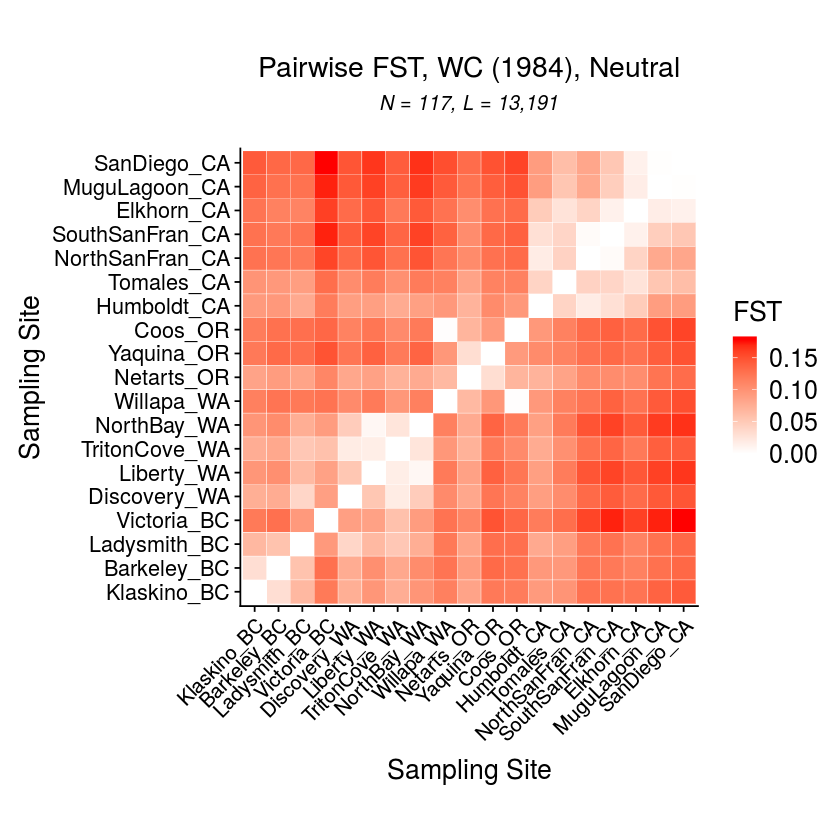

In [25]:
neutral <- ggplot(data = meltedN, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Neutral", atop(italic("N = 117, L = 13,191"), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  theme(axis.title = element_text(size = 16),legend.text = element_text(size =15), legend.title = element_text(size =16)) +
  theme(plot.title = element_text(size = 17)) +
coord_fixed()
neutral

### Mantel Test

In [30]:
x <- as.matrix(read.csv("Ostrea Phylogeography Samples - Water Distance.csv",header = T,row.names = 1))
Dgeo <- as.dist(x)
fst_N <- gindF.fst.mat.tri/(1-gindF.fst.mat.tri)
DgenN <- as.dist(fst_N)
ibd <- mantel.randtest(DgenN,Dgeo)
ibd

Monte-Carlo test
Call: mantel.randtest(m1 = DgenN, m2 = Dgeo)

Observation: 0.7089485 

Based on 999 replicates
Simulated p-value: 0.001 
Alternative hypothesis: greater 

     Std.Obs  Expectation     Variance 
 8.021911288 -0.001199486  0.007836859 

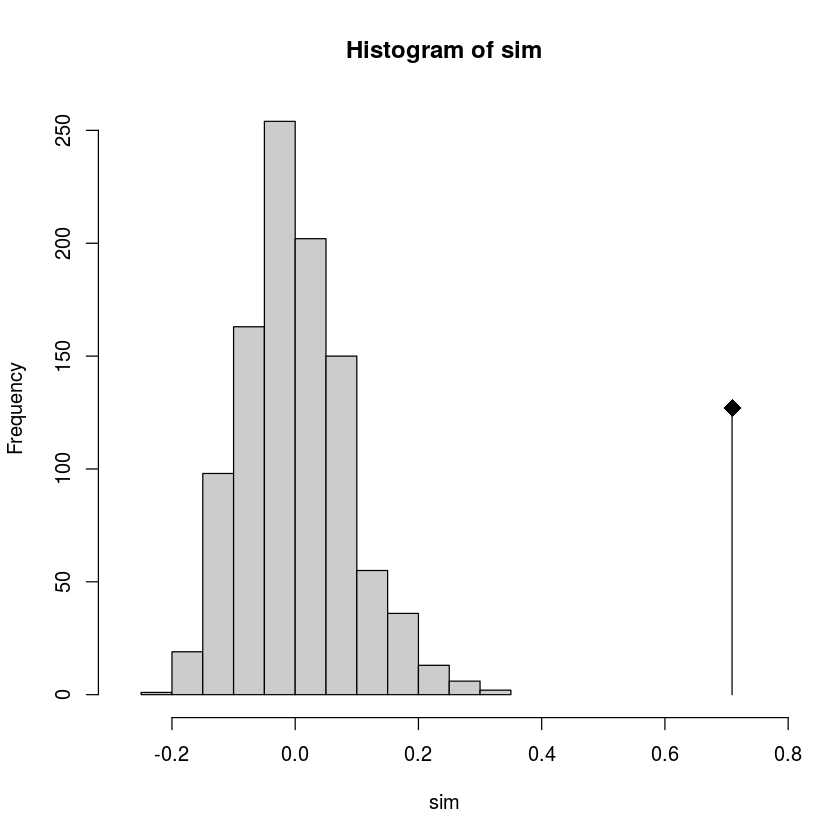

In [74]:
plot(ibd)

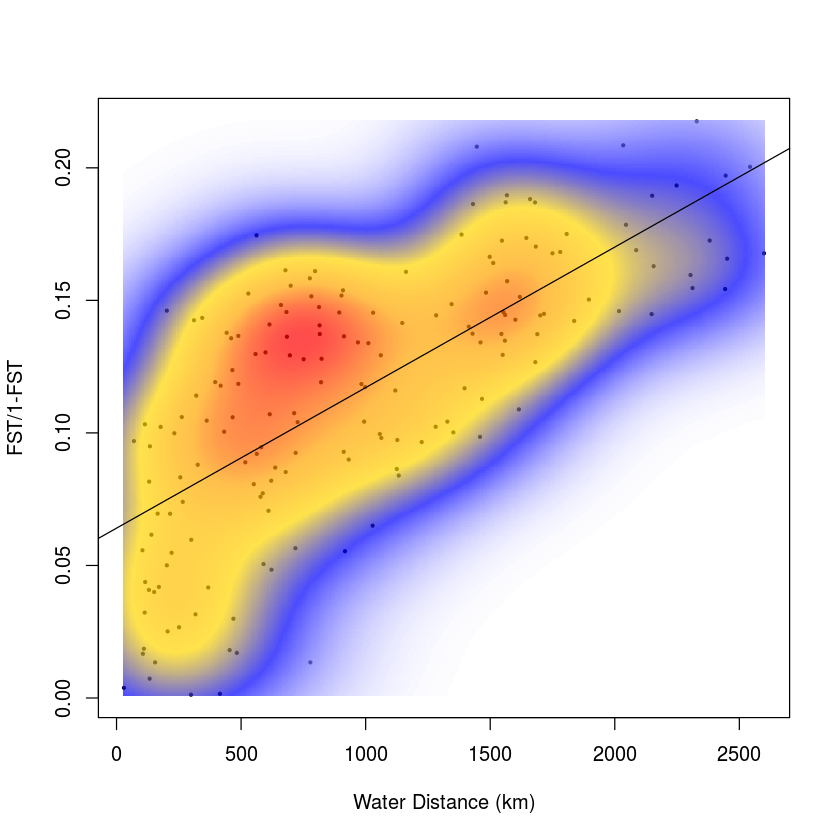

In [75]:
library(MASS)
dens <- kde2d(Dgeo,DgenN, n=300)
myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgeo, DgenN, pch=20,cex=.5,xlab = "Water Distance (km)", ylab = "FST/1-FST")
image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(DgenN~Dgeo))

#### Regions

In [11]:
pop_order

[1] "Klaskino_BC"     "Barkeley_BC"     "Ladysmith_BC"    "Victoria_BC"    
 [5] "Discovery_WA"    "Liberty_WA"      "TritonCove_WA"   "NorthBay_WA"    
 [9] "Willapa_WA"      "Netarts_OR"      "Yaquina_OR"      "Coos_OR"        
[13] "Humboldt_CA"     "Tomales_CA"      "NorthSanFran_CA" "SouthSanFran_CA"
[17] "Elkhorn_CA"      "MuguLagoon_CA"   "SanDiego_CA"

In [4]:
hf.reg <- hf.filt
regions <- c("NWBC","NWBC",rep("Puget+BC",6),"Willapa","Oregon","Oregon","Willapa",rep("NoCal",4),rep("SoCal",3))
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19), to = regions)

In [17]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.reg.N <- genet.dist(hf.reg, method = "WC84")

In [18]:
fst.mat.reg.N

              NoCal       NWBC     Oregon   Puget+BC      SoCal
NWBC     0.08362901                                            
Oregon   0.07917922 0.09017937                                 
Puget+BC 0.08854278 0.06330010 0.08069727                      
SoCal    0.05193454 0.11735042 0.11539898 0.13848112           
Willapa  0.09663252 0.11238477 0.07114177 0.09278126 0.13554003

In [19]:
NS <- c("NWBC","Puget+BC","Willapa","Oregon","NoCal","SoCal")
gindF.fst.mat.tri <- as.matrix(fst.mat.reg.N)
gindF.fst.mat.tri <- gindF.fst.mat.tri[NS,NS]

In [20]:
gindF.fst.mat.tri

,NWBC,Puget+BC,Willapa,Oregon,NoCal,SoCal
NWBC,0.00000000,0.06330010,0.11238477,0.09017937,0.08362901,0.11735042
Puget+BC,0.06330010,0.00000000,0.09278126,0.08069727,0.08854278,0.13848112
Willapa,0.11238477,0.09278126,0.00000000,0.07114177,0.09663252,0.13554003
Oregon,0.09017937,0.08069727,0.07114177,0.00000000,0.07917922,0.11539898
NoCal,0.08362901,0.08854278,0.09663252,0.07917922,0.00000000,0.05193454
SoCal,0.11735042,0.13848112,0.13554003,0.11539898,0.05193454,0.00000000


In [69]:
#write.table(gindF.fst.mat.tri, file="OL-t10x45m75-maf025-NeutI2-Reg.pwfst",row.names = T,col.names = T)

meltedN_reg <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [68]:
gindF.fst.mat.tri <- as.matrix(read.table("OL-t10x45m75-maf025-NeutI2-Reg.pwfst"))

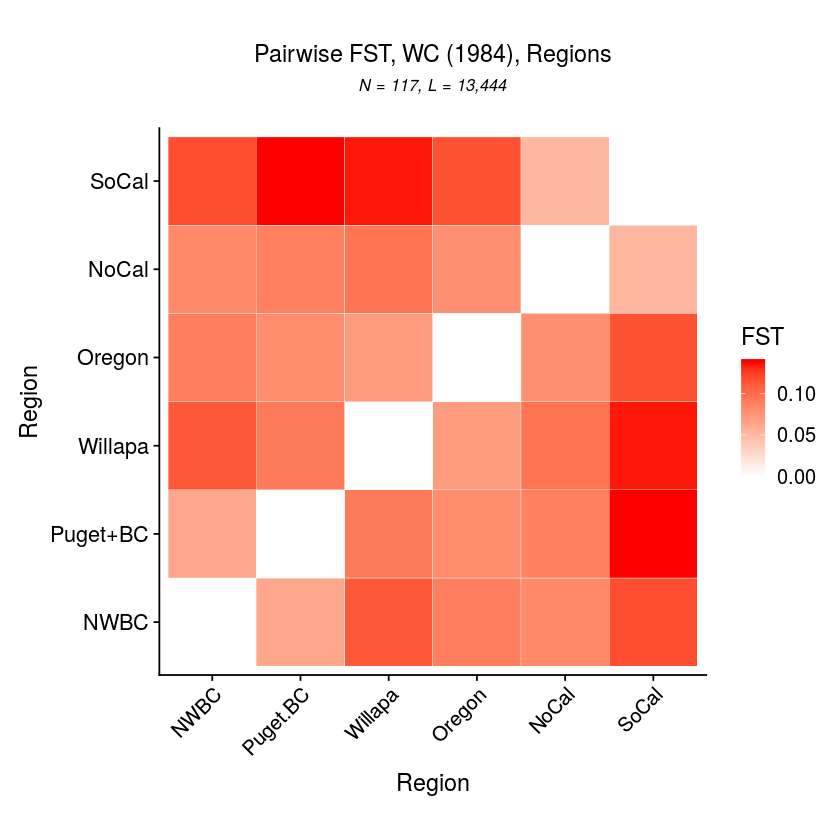

In [70]:
neut_reg <- ggplot(data = meltedN_reg, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Regions", atop(italic("N = 117, L = 13,444"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()
neut_reg

### Genetic diversity (observed and expected heterozygosity)

In [5]:
stratted.filt

/// GENIND OBJECT /////////

 // 117 individuals; 13,191 loci; 26,382 alleles; size: 19 Mb

 // Basic content
   @tab:  117 x 26382 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 26382 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


In [6]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

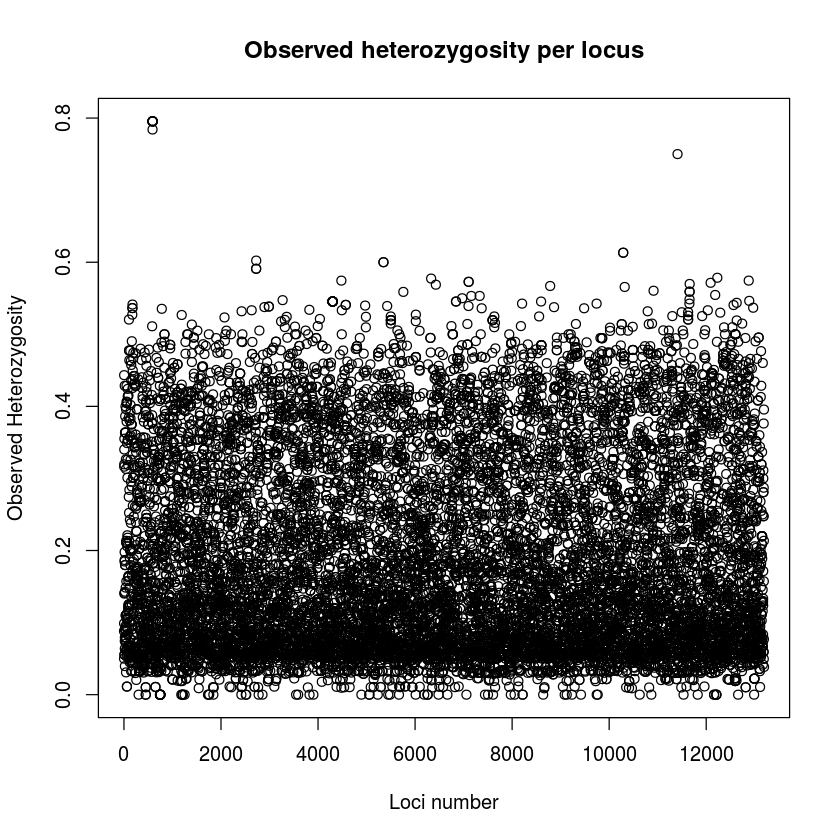

In [7]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

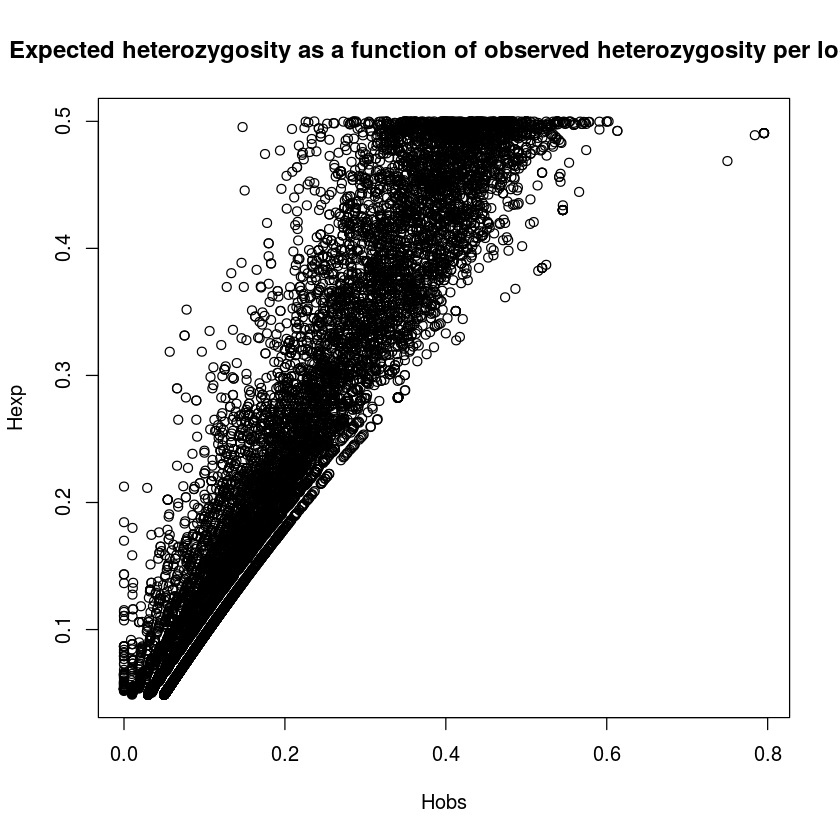

In [8]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [9]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 143.83, df = 1, p-value < 2.2e-16


Significant difference between observed and expected heterozygosity

In [10]:
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 3) 

In [11]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.192
Hs,0.202
Ht,0.224
Dst,0.022
Htp,0.226
Dstp,0.023
Fst,0.099
Fstp,0.104
Fis,0.052
Dest,0.029


In [12]:
boot <- boot.ppfis(hf.filt,nboot = 1000)
boot5 <- boot.ppfis(hf.filt,nboot = 1000,quant = 0.5)

In [13]:
latitude = c(50.298667,49.01585,49.011383,48.435667,47.9978,47.7375,47.6131,47.3925,46.532386,45.3911556,44.579539,43.3559861,40.8557972,38.117549,37.95507,37.70867,36.8398194,34.101914,32.602500)

In [14]:
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis,boot$fis.ci,latitude)
x

,Ho,He,Fis,ll,hl,latitude
Klaskino_BC,0.1783653,0.1914905,0.0690,0.0588,0.0785,50.29867
Barkeley_BC,0.1749105,0.1877193,0.0668,0.0547,0.0801,49.01585
Ladysmith_BC,0.1987649,0.1905447,-0.0523,-0.0661,-0.0390,49.01138
Victoria_BC,0.1636069,0.1732714,0.0543,0.0433,0.0658,48.43567
Discovery_WA,0.1709767,0.1819841,0.0602,0.0477,0.0718,47.99780
Liberty_WA,0.1726838,0.1782434,0.0303,0.0191,0.0409,47.73750
TritonCove_WA,0.1763951,0.1832275,0.0364,0.0241,0.0508,47.61310
NorthBay_WA,0.1673783,0.1769386,0.0530,0.0418,0.0652,47.39250
Willapa_WA,0.1695808,0.1803022,0.0581,0.0449,0.0722,46.53239
Netarts_OR,0.1856840,0.1972606,0.0579,0.0472,0.0691,45.39116


In [15]:
summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.09930  0.03155  0.05430  0.04237  0.06350  0.13150 

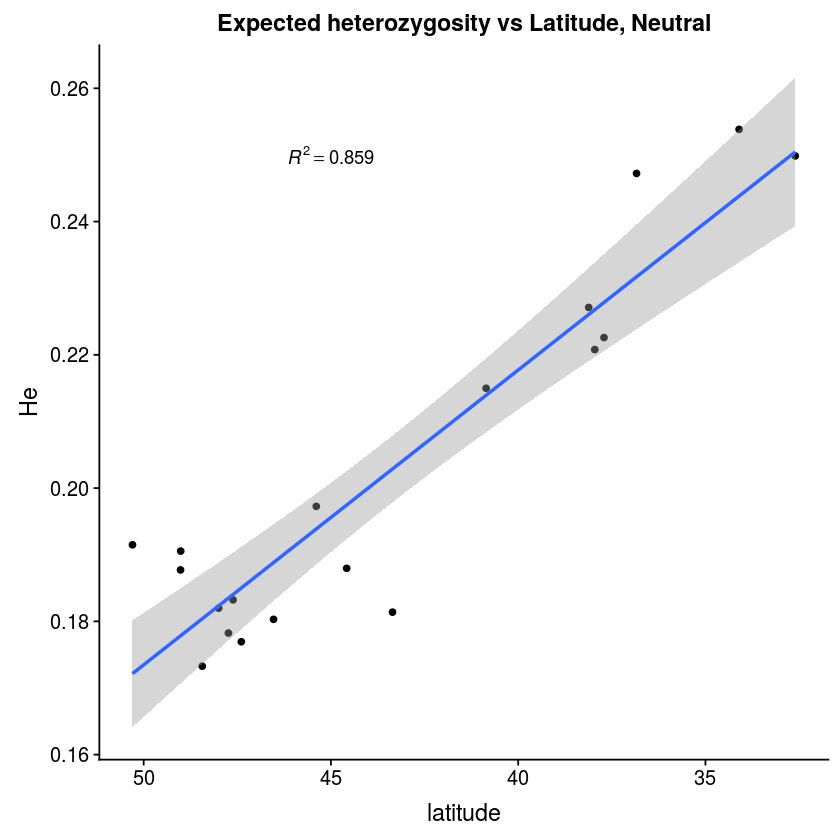

In [16]:
R2 = round(summary(lm(x$He ~ x$latitude))$r.squared, 3)             

ggplot(x, aes(x = latitude, y = He)) + geom_point() + 
geom_smooth(method=lm) + 
ggtitle("Expected heterozygosity vs Latitude, Neutral") +
annotate(geom = "text", label=paste("italic(R^2)==",R2), x=45, y=0.25, parse=T) +
scale_x_reverse()

#### Regions

Significant difference between observed and expected heterozygosity

In [17]:
basicstat <- basic.stats(hf.reg, diploid = TRUE, digits = 3) 

In [18]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.191
Hs,0.207
Ht,0.225
Dst,0.018
Htp,0.228
Dstp,0.022
Fst,0.081
Fstp,0.096
Fis,0.077
Dest,0.028


In [19]:
boot <- boot.ppfis(hf.reg,nboot = 1000)
boot5 <- boot.ppfis(hf.reg,nboot = 1000,quant = 0.5)

In [27]:
nwbc <- hf.filt[which(hf.filt$POP_ID %in% c(1,2)),]
puget <- hf.filt[which(hf.filt$POP_ID %in% c(3:8)),]
willapa <- hf.filt[which(hf.filt$POP_ID %in% c(9,12)),]
oregon <- hf.filt[which(hf.filt$POP_ID %in% c(10,11)),]
Nocal <- hf.filt[which(hf.filt$POP_ID %in% c(13:16)),]
Socal <- hf.filt[which(hf.filt$POP_ID %in% c(17:19)),]

#nwbc <- hf.filt[which(hf.filt$POP_ID %in% c("Klaskino_BC","Barkeley_BC")),]
#puget <- hf.filt[which(hf.filt$POP_ID %in% c('Ladysmith_BC','Victoria_BC','Discovery_WA','Liberty_WA','TritonCove_WA','NorthBay_WA')),]
#willapa <- hf.filt[which(hf.filt$POP_ID %in% c("Willapa_WA","Coos_OR")),]
#oregon <- hf.filt[which(hf.filt$POP_ID %in% c("Netarts_OR","Yaquina_OR")),]
#Nocal <- hf.filt[which(hf.filt$POP_ID %in% c('Humboldt_CA','Tomales_CA','NorthSanFran_CA','SouthSanFran_CA')),]
#Socal <- hf.filt[which(hf.filt$POP_ID %in% c('Elkhorn_CA','MuguLagoon_CA','SanDiego_CA')),]

In [28]:
nwbc <- basic.stats(nwbc, digits = 3)
puget <- basic.stats(puget, digits = 3)
willapa <- basic.stats(willapa, digits = 3)
oregon <- basic.stats(oregon, digits = 3)
Nocal <- basic.stats(Nocal, digits = 3)
Socal <- basic.stats(Socal, digits = 3)

In [29]:
fst <- c(nwbc$overall[7],puget$overall[7],willapa$overall[7],oregon$overall[7],Nocal$overall[7],Socal$overall[7])

In [32]:
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll 
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NWBC","Puget+BC","Willapa","Oregon","NoCal","SoCal")
x <- x[NS,]
cbind(x,fst)

,Ho,He,Fis,ll,hl,fst
NWBC,0.1772935,0.1931327,0.0822,0.0748,0.0899,0.016
Puget+BC,0.1731989,0.1885636,0.0812,0.0761,0.0865,0.046
Willapa,0.1704680,0.1811311,0.0587,0.0502,0.0674,0.001
Oregon,0.1850071,0.1958126,0.0554,0.0470,0.0632,0.016
NoCal,0.2147366,0.2266866,0.0527,0.0472,0.0583,0.022
SoCal,0.2236243,0.2529351,0.1160,0.1097,0.1216,0.007


## Outlier
Load previously created Adegenet genind object and hierfstat object, made using radiator from a .vcf file.

In [45]:
load("../Inputs/OL-c85t10-x45m75-maf025-outI2Union-filt.hf")
load("../Inputs/OL-c85t10-x45m75-maf025-outI2Union-filt.genind")

### Pairwise Fst

In [18]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat <- genet.dist(hf.filt, method = "WC84")

In [19]:
gindF.fst.mat.tri <- as.matrix(fst.mat)
colnames(gindF.fst.mat.tri) <- pop_order
rownames(gindF.fst.mat.tri) <- pop_order
write.table(gindF.fst.mat.tri, file="OL-t10x45m75-maf025-outI2Union-Pop.pwfst",row.names = T,col.names = T)

In [36]:
gindF.fst.mat.tri <- as.matrix(read.table("OL-t10x45m75-maf025-outI2Union-Pop.pwfst"))

In [7]:
meltedO <- melt(gindF.fst.mat.tri, na.rm =TRUE)

In [8]:
gindF.fst.mat.tri

,Klaskino_BC,Barkeley_BC,Ladysmith_BC,Victoria_BC,Discovery_WA,Liberty_WA,TritonCove_WA,NorthBay_WA,Willapa_WA,Netarts_OR,Yaquina_OR,Coos_OR,Humboldt_CA,Tomales_CA,NorthSanFran_CA,SouthSanFran_CA,Elkhorn_CA,MuguLagoon_CA,SanDiego_CA
Klaskino_BC,0.00000000,0.06950578,0.22842268,0.4893952,0.25811262,0.41393244,0.41265856,0.44195336,0.466136132,0.44344176,0.48821942,0.449600474,0.51225275,0.3898766,0.55464443,0.53778821,0.5155059,0.62024996,0.62873406
Barkeley_BC,0.06950578,0.00000000,0.11285477,0.3999890,0.13139648,0.30486712,0.30400080,0.32963388,0.439291185,0.39538301,0.46435459,0.423431829,0.48839418,0.3756599,0.52961192,0.49823446,0.4809507,0.59254050,0.59423528
Ladysmith_BC,0.22842268,0.11285477,0.00000000,0.3465281,0.08495661,0.20194923,0.19137940,0.21862749,0.400381167,0.33625988,0.40323342,0.374883878,0.42819483,0.3515329,0.48457568,0.48340883,0.4757936,0.60221164,0.60934529
Victoria_BC,0.48939518,0.39998902,0.34652812,0.0000000,0.26793496,0.17252642,0.13269838,0.17903129,0.553333729,0.45316383,0.52611917,0.536221611,0.55854559,0.5090688,0.60722144,0.63264078,0.5892790,0.68100248,0.69241584
Discovery_WA,0.25811262,0.13139648,0.08495661,0.2679350,0.00000000,0.13070316,0.12873214,0.12991464,0.393232703,0.35457564,0.42050911,0.380080261,0.49002220,0.3937428,0.53944795,0.54186478,0.5047344,0.61772181,0.62458407
Liberty_WA,0.41393244,0.30486712,0.20194923,0.1725264,0.13070316,0.00000000,0.05673845,0.02308110,0.496709657,0.38592384,0.46699389,0.484478975,0.50579606,0.4704699,0.57332786,0.58929429,0.5661192,0.66315562,0.67233610
TritonCove_WA,0.41265856,0.30400080,0.19137940,0.1326984,0.12873214,0.05673845,0.00000000,0.06572933,0.482548802,0.40492138,0.46899055,0.472030864,0.51441240,0.4541942,0.56722068,0.58679939,0.5591532,0.65613097,0.66337205
NorthBay_WA,0.44195336,0.32963388,0.21862749,0.1790313,0.12991464,0.02308110,0.06572933,0.00000000,0.516889588,0.41075846,0.49134933,0.499635184,0.50997720,0.4766624,0.56643185,0.59553076,0.5684854,0.66721079,0.68428358
Willapa_WA,0.46613613,0.43929118,0.40038117,0.5533337,0.39323270,0.49670966,0.48254880,0.51688959,0.000000000,0.13039943,0.16486488,0.005679752,0.45902785,0.3643268,0.50054537,0.48792746,0.4327481,0.57651106,0.58726348
Netarts_OR,0.44344176,0.39538301,0.33625988,0.4531638,0.35457564,0.38592384,0.40492138,0.41075846,0.130399427,0.00000000,0.03300564,0.122023451,0.41966002,0.3102892,0.46484688,0.45063522,0.4393838,0.58309958,0.57396264


In [9]:
#Average pairwise Fst
summary(meltedO$value)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2995  0.4542  0.3980  0.5362  0.6924 

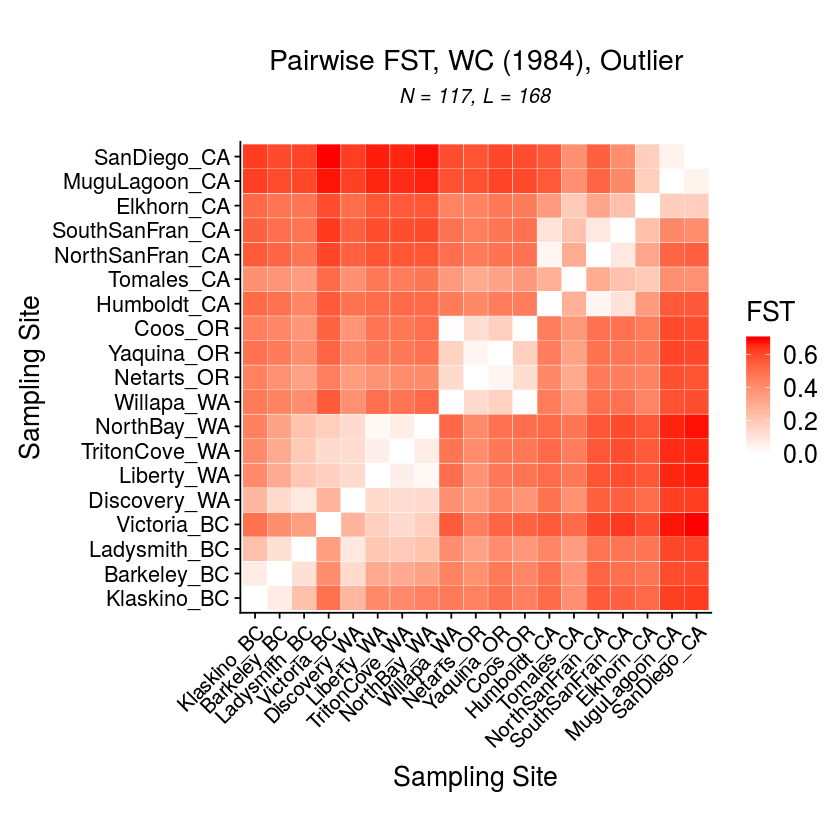

In [10]:
outlier <- ggplot(data = meltedO, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Outlier", atop(italic("N = 117, L = 168"), ""))))+
  labs( x = "Sampling Site", y = "Sampling Site") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  theme(axis.title = element_text(size = 16),legend.text = element_text(size =15), legend.title = element_text(size =16)) +
  theme(plot.title = element_text(size = 17)) +
coord_fixed()
outlier

### Mantel Test

In [37]:
x <- as.matrix(read.csv("Ostrea Phylogeography Samples - Water Distance.csv",header = T,row.names = 1))
Dgeo <- as.dist(x)
fst_O <- gindF.fst.mat.tri/(1-gindF.fst.mat.tri)
DgenO <- as.dist(fst_O)
ibd <- mantel.randtest(DgenO,Dgeo)
ibd

Monte-Carlo test
Call: mantel.randtest(m1 = DgenO, m2 = Dgeo)

Observation: 0.859723 

Based on 999 replicates
Simulated p-value: 0.001 
Alternative hypothesis: greater 

    Std.Obs Expectation    Variance 
8.945870065 0.001156852 0.009210907 

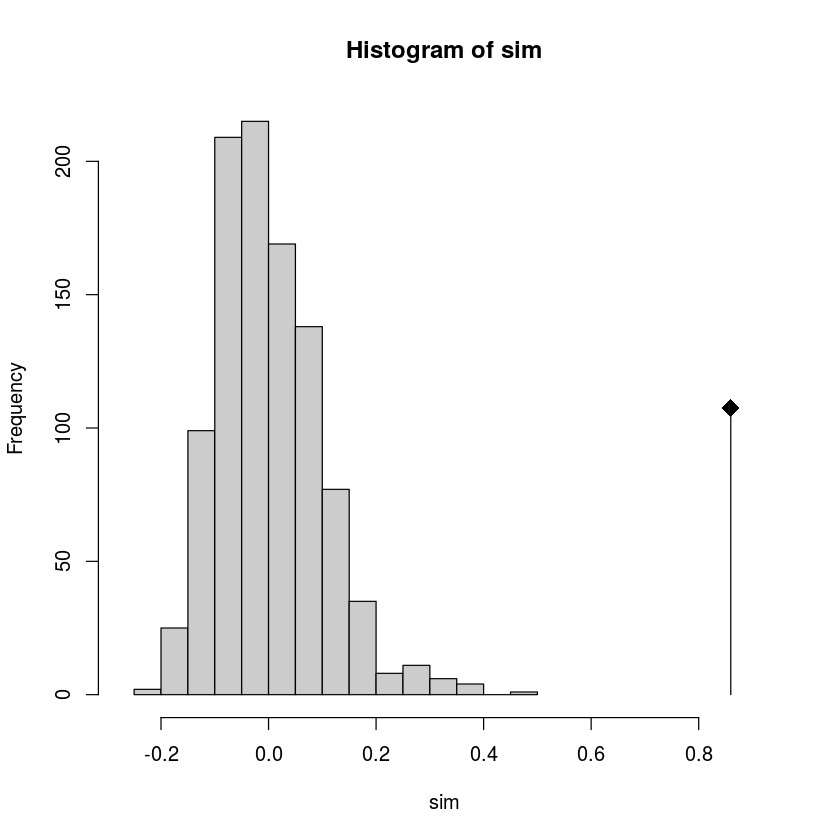

In [38]:
plot(ibd)

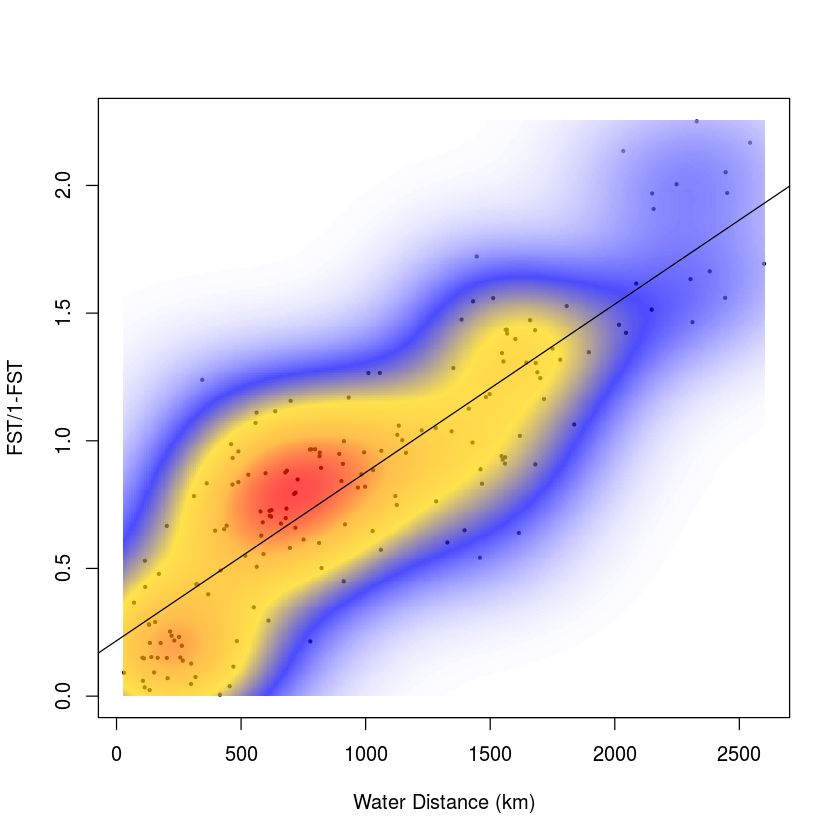

In [39]:
library(MASS)
dens <- kde2d(Dgeo,DgenO, n=300)
myPal <- colorRampPalette(c("white","blue","gold", "orange", "red"))
plot(Dgeo, DgenO, pch=20,cex=.5,xlab = "Water Distance (km)", ylab = "FST/1-FST")
image(dens, col=transp(myPal(300),.7), add=TRUE)
abline(lm(DgenO~Dgeo))

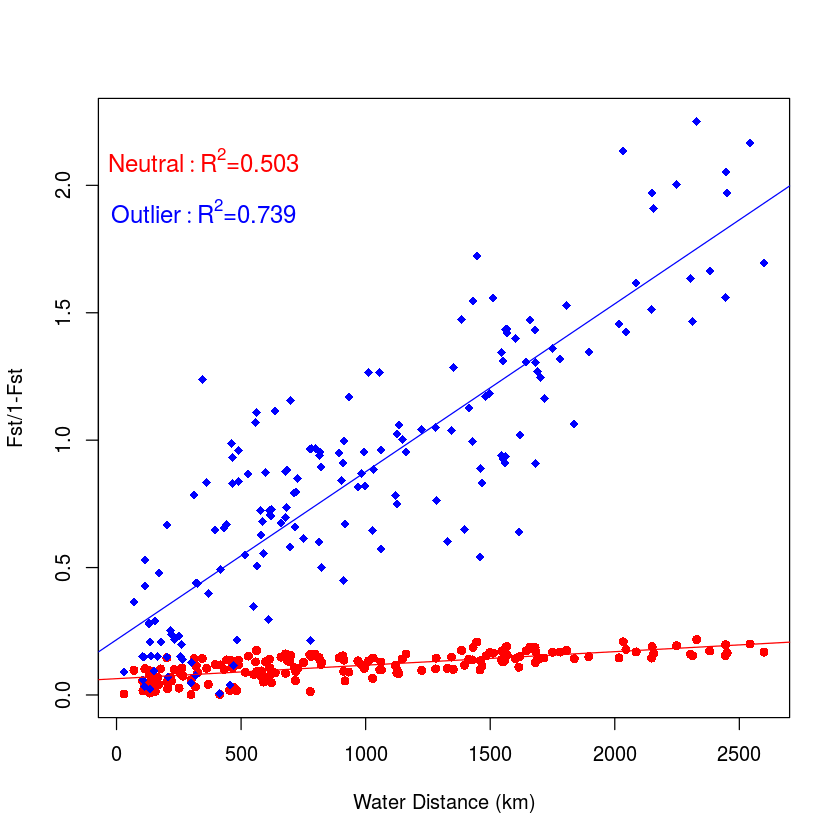

In [44]:
ylim <- range(DgenN, DgenO)

R2N = round(summary(lm(DgenN ~ Dgeo))$r.squared, 3)
R2O = round(summary(lm(DgenO ~ Dgeo))$r.squared, 3)
plot(Dgeo, DgenN, col = "red",ylim = ylim,pch = 16, xlab = "Water Distance (km)", ylab = "Fst/1-Fst")
points(Dgeo, DgenO, col = "blue",pch=18)
text(350,1.9,substitute(paste(Outlier: R^2,"=",r ),list(r=R2O)), col = "blue",cex = 1.2)
text(350,2.1,substitute(paste(Neutral: R^2,"=",r ),list(r=R2N)), col = "red",cex = 1.2)
abline(lm(DgenN~Dgeo),col="red")
abline(lm(DgenO~Dgeo),col="blue")


#### Regions

In [11]:
hf.reg <- hf.filt
regions <- c("NWBC","NWBC",rep("Puget+BC",6),"Willapa","Oregon","Oregon","Willapa",rep("NoCal",4),rep("SoCal",3))
hf.reg$POP_ID <- mapvalues(hf.reg$POP_ID, from =c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19), to = regions)

In [12]:
#fst.mat <- pairwise.fst(stratted.filt)
fst.mat.reg.O <- genet.dist(hf.reg, method = "WC84")

In [13]:
NS <- c("NWBC","Puget+BC","Willapa","Oregon","NoCal","SoCal")
gindF.fst.mat.tri <- as.matrix(fst.mat.reg.O)
gindF.fst.mat.tri <- gindF.fst.mat.tri[NS,NS]

In [14]:
gindF.fst.mat.tri

,NWBC,Puget+BC,Willapa,Oregon,NoCal,SoCal
NWBC,0.0000000,0.2964848,0.4358563,0.4359142,0.3807158,0.5264109
Puget+BC,0.2964848,0.0000000,0.4629631,0.4158461,0.4510303,0.6193133
Willapa,0.4358563,0.4629631,0.0000000,0.1359985,0.3663181,0.5092193
Oregon,0.4359142,0.4158461,0.1359985,0.0000000,0.3287381,0.5118184
NoCal,0.3807158,0.4510303,0.3663181,0.3287381,0.0000000,0.3602298
SoCal,0.5264109,0.6193133,0.5092193,0.5118184,0.3602298,0.0000000


In [15]:
write.table(gindF.fst.mat.tri, file="OL-t10x45m75-maf025-OutI2Union-Reg.pwfst",row.names = T,col.names = T)

meltedO_reg <- melt(gindF.fst.mat.tri, na.rm =TRUE)

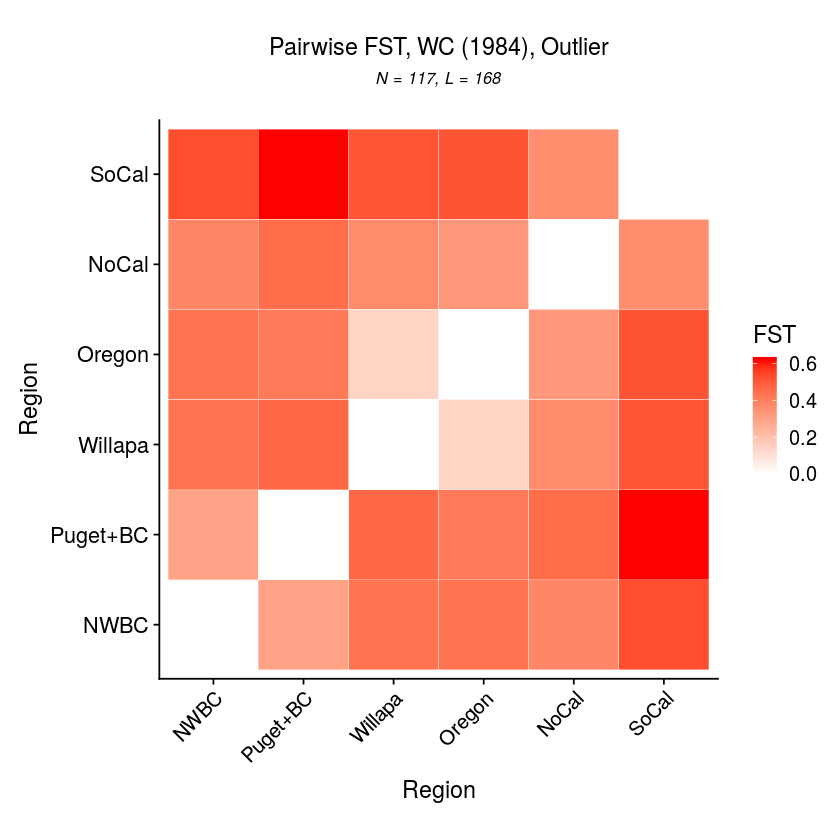

In [16]:
out_reg <- ggplot(data = meltedO_reg, aes(Var2, Var1, fill = value))+ geom_tile(color = "white")+ 
  scale_fill_gradient(low = "white", high = "red", name="FST")  +
  ggtitle(expression(atop("Pairwise FST, WC (1984), Outlier", atop(italic("N = 117, L = 168"), ""))))+
  labs( x = "Region", y = "Region") + 
  theme(axis.text.x = element_text(angle = 45, vjust = 1, size = 12, hjust = 1),axis.text.y = element_text(size = 13)) + 
  coord_fixed()
out_reg

### Genetic diversity (observed and expected heterozygosity)

In [46]:
stratted.filt

/// GENIND OBJECT /////////

 // 117 individuals; 168 loci; 336 alleles; size: 269.5 Kb

 // Basic content
   @tab:  117 x 336 matrix of allele counts
   @loc.n.all: number of alleles per locus (range: 2-2)
   @loc.fac: locus factor for the 336 columns of @tab
   @all.names: list of allele names for each locus
   @ploidy: ploidy of each individual  (range: 2-2)
   @type:  codom
   @call: radiator::write_genind(data = input)

 // Optional content
   @pop: population of each individual (group size range: 4-9)
   @strata: a data frame with 3 columns ( POPULATION, LOCATION, REGION )
   @other: a list containing: LATITUDE  LONGITUDE 


In [47]:
#All populations
comb <- summary(stratted.filt)
names(comb)

[1] "n"         "n.by.pop"  "loc.n.all" "pop.n.all" "NA.perc"   "Hobs"     
[7] "Hexp"

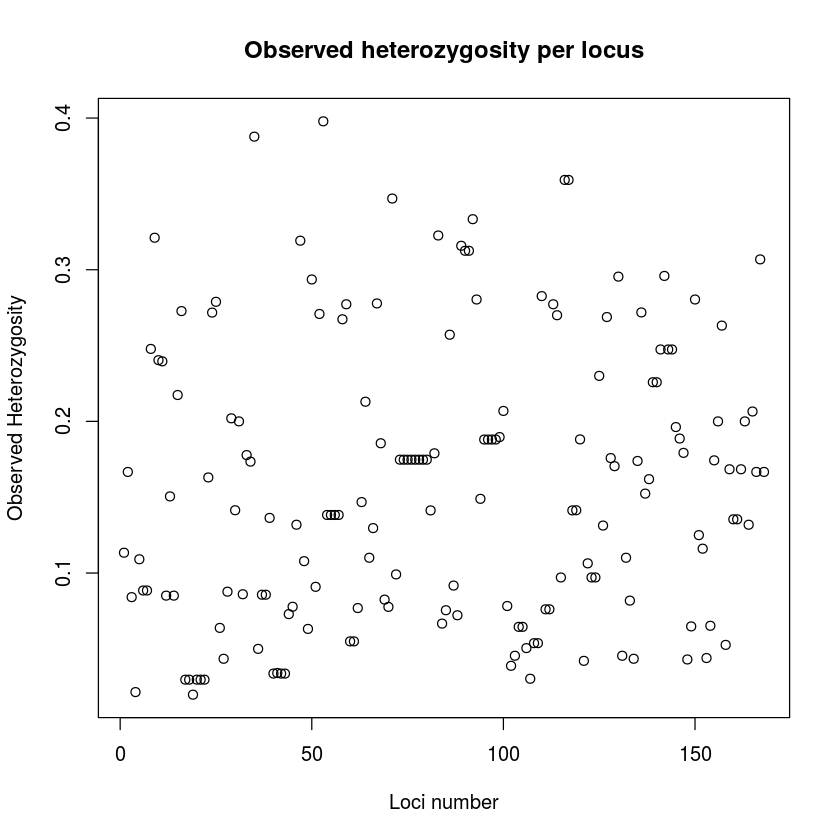

In [48]:
plot(comb$Hobs, xlab="Loci number", ylab="Observed Heterozygosity", 
     main="Observed heterozygosity per locus")

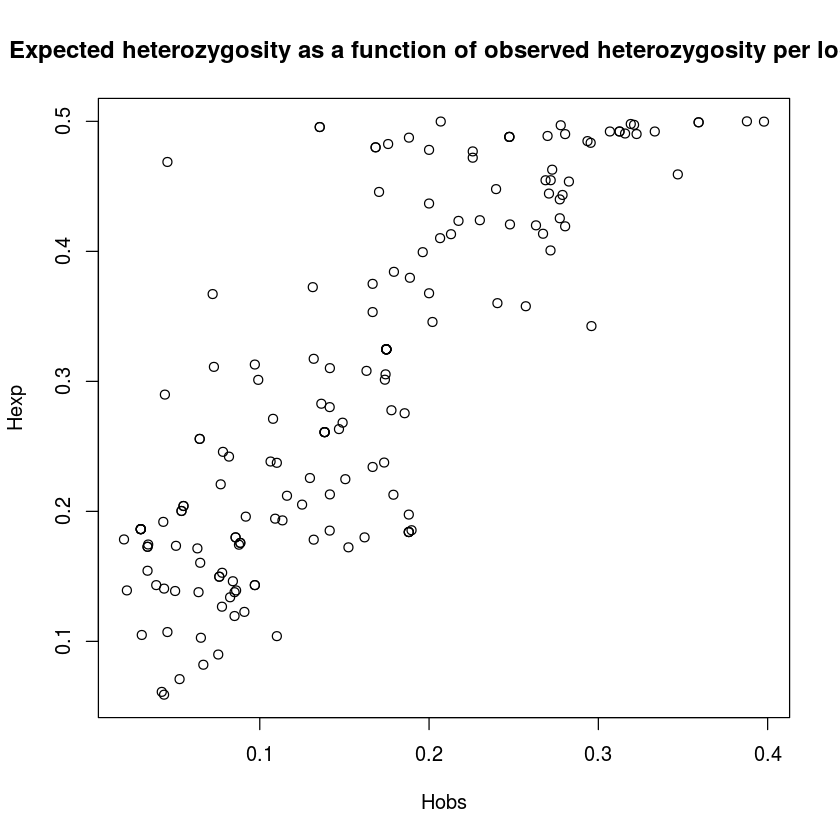

In [49]:
plot(comb$Hobs,comb$Hexp, xlab="Hobs", ylab="Hexp", 
     main="Expected heterozygosity as a function of observed heterozygosity per locus")

In [50]:
bartlett.test(list(comb$Hexp, comb$Hobs)) # a test : H0: Hexp = Hobs


	Bartlett test of homogeneity of variances

data:  list(comb$Hexp, comb$Hobs)
Bartlett's K-squared = 23.18, df = 1, p-value = 1.475e-06


Significant difference between observed and expected heterozygosity

In [51]:
basicstat <- basic.stats(hf.filt, diploid = TRUE, digits = 3) 

In [52]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.164
Hs,0.168
Ht,0.304
Dst,0.136
Htp,0.312
Dstp,0.144
Fst,0.448
Fstp,0.461
Fis,0.024
Dest,0.173


In [53]:
boot <- boot.ppfis(hf.filt,nboot = 1000)
boot5 <- boot.ppfis(hf.filt,nboot = 1000,quant = 0.5)

In [54]:
latitude = c(50.298667,49.01585,49.011383,48.435667,47.9978,47.7375,47.6131,47.3925,46.532386,45.3911556,44.579539,43.3559861,40.8557972,38.117549,37.95507,37.70867,36.8398194,34.101914,32.602500)

In [55]:
colnames(basicstat$Ho) <- pop_order
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis,boot$fis.ci,latitude)
x

,Ho,He,Fis,ll,hl,latitude
Klaskino_BC,0.11283929,0.11609524,0.0287,-0.0666,0.1278,50.29867
Barkeley_BC,0.10872619,0.12726786,0.1458,0.0017,0.2839,49.01585
Ladysmith_BC,0.18502976,0.13373214,-0.3844,-0.5166,-0.2470,49.01138
Victoria_BC,0.08538095,0.07533929,-0.1378,-0.2037,-0.0445,48.43567
Discovery_WA,0.13273810,0.13711310,0.0281,-0.0812,0.1486,47.99780
Liberty_WA,0.08879762,0.10160119,0.1285,-0.0221,0.2677,47.73750
TritonCove_WA,0.11716667,0.09871429,-0.1818,-0.2967,-0.0806,47.61310
NorthBay_WA,0.09158333,0.09607143,0.0467,-0.0390,0.1395,47.39250
Willapa_WA,0.16864881,0.16655357,-0.0116,-0.1675,0.1284,46.53239
Netarts_OR,0.18197619,0.18161905,-0.0019,-0.0945,0.0897,45.39116


In [56]:
summary(Fis)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.38440 -0.01525  0.02090  0.01042  0.08060  0.26580 

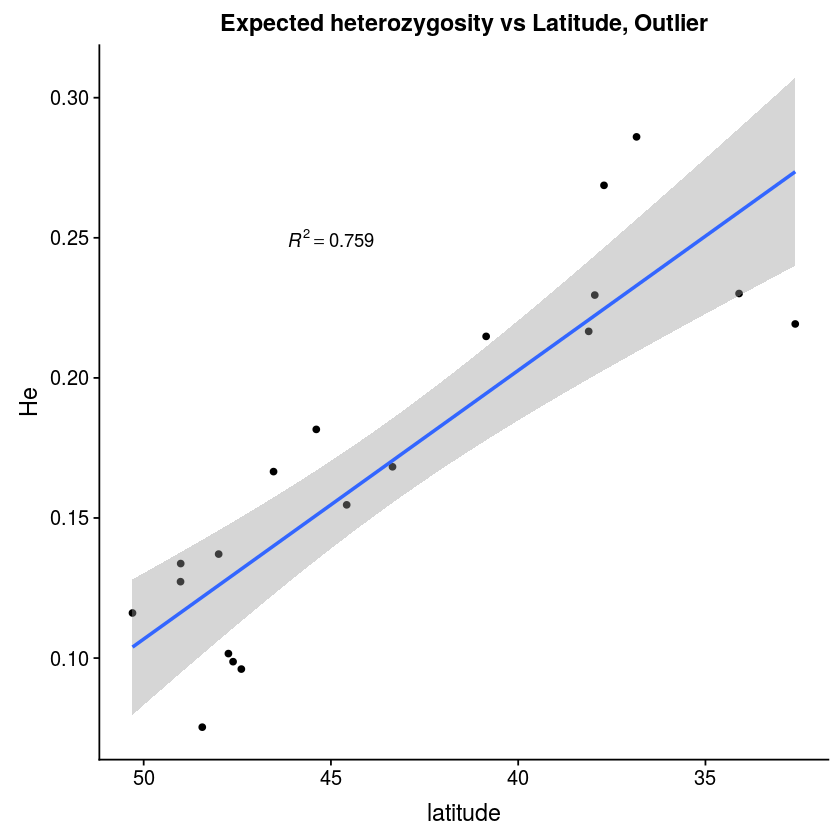

In [57]:
R2 = round(summary(lm(x$He ~ x$latitude))$r.squared, 3)             

ggplot(x, aes(x = latitude, y = He)) + geom_point() + 
geom_smooth(method=lm) + 
ggtitle("Expected heterozygosity vs Latitude, Outlier") +
annotate(geom = "text", label=paste("italic(R^2)==",R2), x=45, y=0.25, parse=T) +
scale_x_reverse()

#### Regions

Significant difference between observed and expected heterozygosity

In [58]:
basicstat <- basic.stats(hf.reg, diploid = TRUE, digits = 3) 

In [59]:
as.data.frame(basicstat$overall)

,basicstat$overall
Ho,0.163
Hs,0.187
Ht,0.307
Dst,0.120
Htp,0.331
Dstp,0.144
Fst,0.390
Fstp,0.434
Fis,0.131
Dest,0.177


In [60]:
boot <- boot.ppfis(hf.reg,nboot = 1000)
boot5 <- boot.ppfis(hf.reg,nboot = 1000,quant = 0.5)

In [61]:
nwbc <- hf.filt[which(hf.filt$POP_ID %in% c(1,2)),]
puget <- hf.filt[which(hf.filt$POP_ID %in% c(3:8)),]
willapa <- hf.filt[which(hf.filt$POP_ID %in% c(9,12)),]
oregon <- hf.filt[which(hf.filt$POP_ID %in% c(10,11)),]
Nocal <- hf.filt[which(hf.filt$POP_ID %in% c(13:16)),]
Socal <- hf.filt[which(hf.filt$POP_ID %in% c(17:19)),]

In [62]:
nwbc <- basic.stats(nwbc, digits = 3)
puget <- basic.stats(puget, digits = 3)
willapa <- basic.stats(willapa, digits = 3)
oregon <- basic.stats(oregon, digits = 3)
Nocal <- basic.stats(Nocal, digits = 3)
Socal <- basic.stats(Socal, digits = 3)

In [63]:
fst <- c(nwbc$overall[7],puget$overall[7],willapa$overall[7],oregon$overall[7],Nocal$overall[7],Socal$overall[7])

In [64]:
Ho <- colMeans(basicstat$Ho,na.rm = T)
He <- colMeans(basicstat$Hs,na.rm = T)
Fis<- boot5$fis.ci$ll
x <- cbind(Ho,He,Fis, boot$fis.ci)
NS <- c("NWBC","Puget+BC","Willapa","Oregon","NoCal","SoCal")
x <- x[NS,]
cbind(x,fst)

,Ho,He,Fis,ll,hl,fst
NWBC,0.1107917,0.1239583,0.1060,0.0344,0.1783,0.034
Puget+BC,0.1092083,0.1195655,0.0831,0.0298,0.1497,0.136
Willapa,0.1582857,0.1690833,0.0651,-0.0499,0.1692,0.004
Oregon,0.1812679,0.1718393,-0.0565,-0.1288,0.0240,0.017
NoCal,0.2232381,0.2693095,0.1689,0.1170,0.2264,0.140
SoCal,0.1950774,0.2705417,0.2794,0.2129,0.3468,0.099
